### Import Modules

In [3]:
import numpy as np
import gvar as gv
import lsqfit
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import time

sys.path.append("../")
from fitter import data_loader as dl
from fitter import bootstrapper as bs
from fitter import fitter as fit
from fitter import special_functions as sf

for j in range(10): # Sometimes this needs to be loaded twice...
    matplotlib.rcParams['figure.figsize'] = [10, 10]

In [4]:
reload(bs)
reload(dl)
reload(fit)
reload(sf)

<module 'fitter.special_functions' from '../fitter\special_functions.pyc'>

### Specify fit parameters

In [5]:
p_dict = {
    'order' : {
        'fit' : 'nnlo', # 'nlo', 'nnlo', or 'nnnlo'
        'vol' : 0 # max 10
    }, 
    'bs_N' : 1,  # if 0, use full list
    'fit_type' : 'ma-taylor', #'ma', 'ma-taylor, 'xpt', or 'xpt-taylor'; also 'simultaneous', 'ma-old'
    'F2' : 'FKFpi', #'FKfpi', 'FpiFpi', 'FKFK'
    
    'use_prior' : True,
    'abbrs' : [u'a09m220', u'a09m310', u'a09m350', u'a09m400', u'a12m130',
           u'a12m220',  u'a12m220S', u'a12m220L', u'a12m310', u'a12m350',
           u'a12m400', u'a15m130', u'a15m220', u'a15m310', u'a15m350', 'a15m400'],
    
    'make_plots' : False,
    'show_error_ellipses' : False,
    'show_bs_histograms' : False,
    
    'save_prior' : False,
    'save_results' : False,
}

### Do fit

In [6]:
t0 = time.time()

# Load data
data_loader = dl.data_loader()
fit_data = data_loader.get_fit_data()

# Get prior
prior = None
if p_dict['use_prior']:
    prior = data_loader.get_prior(p_dict['fit_type'])

# Make bootstrapper
bootstrapper = bs.bootstrapper(fit_data, prior=prior, order=p_dict['order'], F2=p_dict['F2'],
                               fit_type=p_dict['fit_type'], bs_N=p_dict['bs_N'], abbrs=p_dict['abbrs'])

if p_dict['make_plots']:
    data_loader.save_plots(
        bootstrapper.make_plots(
            show_error_ellipses=p_dict['show_error_ellipses'], 
            show_bootstrap_histograms=p_dict['show_bs_histograms']),
        output_filename=bootstrapper.fit_type+'_'+bootstrapper.order['fit']
    )
else:
    print bootstrapper
    
if p_dict['save_prior']:
    print 'Saving prior...'
    data_loader.save_prior(bootstrapper.create_prior_from_fit(), p_dict['fit_type'])
    
if p_dict['save_results']:
    data_loader.save_fit_info(bootstrapper.get_fit_info())
    
    
t1 = time.time()

print "\nTotal time (s): ", t1 - t0, "\n"

Making fits...
100% complete Time (s):  0.641999959946
Compiling results...


Fit type: ma-taylor (F^2 = FKFpi, bsN = 1)

Fitting to nnlo 
 with volume corrections O(0) 
Fitted/[FLAG] values at physical point (including SU(2) isospin corrections):

F_K / F_pi = 1.1823(37) [1.1932(19)]   (delta_su2 = -0.00201(22))

  Parameter    Result[0] / Prior[1]    Parameter    Result[0] / Prior[1]
-----------------------------------  -----------------------------------
      L_5 0           0.000357 (31)        A_a 0               9.4 (3.6)
          1             0.0000 (10)            1               0.0 (5.0)
      A_k 0              -0.48 (19)        A_p 0               0.93 (32)
          1               0.0 (5.0)            1               0.0 (5.0)
---
boot0 fit results:
Least Square Fit:
  chi2/dof [dof] = 2 [16]    Q = 0.011    logGBF = 54.516

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 6/0.2)
  fitter = scipy_least_squares    method = trf


Total time (s

In [7]:
pp_data = bootstrapper.get_phys_point_data()

In [13]:
eps2_p = pp_data['mpi']**2 / pp_data['lam2_chi']
eps2_k = pp_data['mk']**2 / pp_data['lam2_chi']

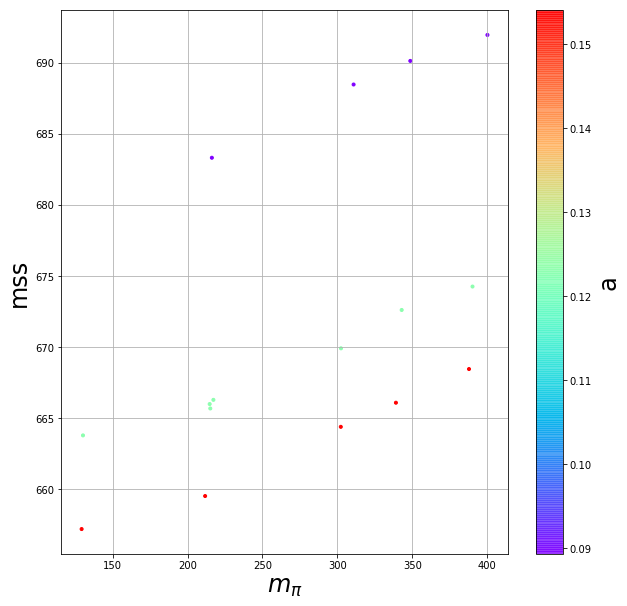

In [21]:
bootstrapper.plot_parameters(xy_parameters=['mpi', 'mss'])

In [18]:
eps2_p* eps2_p *(eps2_k - eps2_p)

0.0000182(21)

### Or make all fits

In [36]:
p_dict = {
    'order' : {
        'vol' : 8 # max 10
    }, 
    'bs_N' : 1,  # if 0, use full list
    'F2' : 'FKFpi', #'FKfpi', 'FpiFpi', 'FKFK'

    'use_prior' : True,
    'abbrs' : [u'a09m220', u'a09m310', u'a09m350', u'a09m400', u'a12m130',
           u'a12m220', u'a12m220S', u'a12m220L', u'a12m310', u'a12m350',
           u'a12m400', u'a15m130', u'a15m220', u'a15m310', u'a15m350', 'a15m400'], # 

    'make_plots' : True,
    'show_error_ellipses' : False,
    'show_bs_histograms' : False,

    'save_prior' : False,
    'save_results' : True,
}

In [37]:
for fit_type in ['xpt', 'xpt-taylor', 'ma', 'ma-taylor']:#, 'ma-old']:
    for order_fit in ['nlo', 'nnlo', 'nnnlo']:#, 'nnnlo']:
        
        print fit_type, order_fit
        
        # Specify fit parameters
        p_dict['order']['fit'] = order_fit
        p_dict['fit_type'] = fit_type
        
        # Do fit
        t0 = time.time()

        # Load data
        data_loader = dl.data_loader()
        fit_data = data_loader.get_fit_data()

        # Get prior
        prior = None
        if p_dict['use_prior']:
            prior = data_loader.get_prior(p_dict['fit_type'])

        # Make bootstrapper
        bootstrapper = bs.bootstrapper(fit_data, prior=prior, order=p_dict['order'], F2=p_dict['F2'],
                                       fit_type=p_dict['fit_type'], bs_N=p_dict['bs_N'], abbrs=p_dict['abbrs'])

        if p_dict['make_plots']:
            data_loader.save_plots(
                bootstrapper.make_plots(
                    show_error_ellipses=p_dict['show_error_ellipses'], 
                    show_bootstrap_histograms=p_dict['show_bs_histograms']),
                output_filename=bootstrapper.fit_type+'_'+bootstrapper.order['fit']
            )
        else:
            print bootstrapper

        if p_dict['save_prior']:
            print 'Saving prior...'
            data_loader.save_prior(bootstrapper.create_prior_from_fit(), p_dict['fit_type'])

        if p_dict['save_results']:
            data_loader.save_fit_info(bootstrapper.get_fit_info())


        t1 = time.time()
        
        #print test(bootstrapper)

        print "\nTotal time (s): ", t1 - t0, "\n"

xpt nlo
Making fits...
100% complete Time (s):  1.06042790413
Compiling results...
Done.
Saving...
Done.

Total time (s):  10.8335719109 

xpt nnlo
Making fits...
100% complete Time (s):  2.24040293694
Compiling results...
Done.
Saving...
Done.

Total time (s):  13.4677140713 

xpt nnnlo
Making fits...
100% complete Time (s):  7.63828396797
Compiling results...
Done.
Saving...
Done.

Total time (s):  21.5267698765 

xpt-taylor nlo
Making fits...
100% complete Time (s):  1.29018783569
Compiling results...
Done.
Saving...
Done.

Total time (s):  9.58585500717 

xpt-taylor nnlo
Making fits...
100% complete Time (s):  3.34227108955
Compiling results...
Done.
Saving...
Done.

Total time (s):  12.7261469364 

xpt-taylor nnnlo
Making fits...
100% complete Time (s):  4.56059002876
Compiling results...
Done.
Saving...
Done.

Total time (s):  13.0083839893 

ma nlo
Making fits...
100% complete Time (s):  2.08027505875
Compiling results...
Done.
Saving...
Done.

Total time (s):  62.1392462254 

m

In [38]:
#bootstrapper.fits[0].show_plots(view='std')